In [205]:
import pandas as pd
import numpy as np
import pygal
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
df = pd.read_csv('data/WorldCupMatches.csv')

In [207]:
df.drop_duplicates(inplace=True)
df = df.loc[~df['Year'].isnull()] 
df.reset_index(drop=True,inplace=True)

In [208]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [209]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [211]:
varc = ['Total_Goals','Attendance']
vard = ['Home Team Initials','Away Team Initials','Stage']

In [212]:
df['Total_Goals'] = df[['Home Team Goals','Away Team Goals']].sum(axis=1)

In [213]:
df['Attendance'].fillna(df.loc[df.Stadium=='Estadio Beira-Rio']['Attendance'].mean(),inplace=True)

In [214]:
def normalizar_discretas(df,v,umbral=0.01):
    aux = df[v].value_counts(True).to_frame()
    aux['ind'] = (aux[v]>=umbral).astype(int)
    aux['x'] = np.where(aux['ind']==1,aux.index,'OTROS')

    if aux.loc[aux['x']=='OTROS'][v].sum()<umbral:
        aux.replace({'OTROS':aux.index[0]},inplace=True)

    aux.drop([v,'ind'],inplace=True,axis=1)
    aux['x']= aux.index+'|'+aux.x
    d = dict([tuple(x.split('|')) for x in aux['x'].to_list()])
    df[v].replace(d,inplace=True)
    return df

In [215]:
df = normalizar_discretas(df,'Home Team Initials',0.04)

In [216]:
df = normalizar_discretas(df,'Away Team Initials',0.03)

In [217]:
for v in vard:
    print(df[v].value_counts(True))

OTROS    0.683014
BRA      0.093301
ITA      0.068182
ARG      0.062201
FRG      0.051435
ENG      0.041866
Name: Home Team Initials, dtype: float64
OTROS    0.790670
MEX      0.044258
FRA      0.035885
ESP      0.034689
ENG      0.032297
ITA      0.031100
BRA      0.031100
Name: Away Team Initials, dtype: float64
Round of 16                 0.076555
Quarter-finals              0.074163
Group 1                     0.074163
Group A                     0.071770
Group B                     0.071770
Group 2                     0.070574
Group 3                     0.066986
Group 4                     0.065789
Group E                     0.057416
Group C                     0.057416
Group F                     0.057416
Group D                     0.057416
Semi-finals                 0.040670
Group H                     0.035885
Group G                     0.035885
Final                       0.022727
Match for third place       0.017943
Group 6                     0.014354
First round       

In [218]:
X = df[varc].copy()

In [219]:
X.shape

(836, 2)

In [220]:
X.describe()

,Total_Goals,Attendance
count,836.000000,836.000000
mean,2.845694,44857.205144
std,1.954909,23537.091302
min,0.000000,2000.000000
25%,1.000000,29800.000000
50%,3.000000,41061.500000
75%,4.000000,60984.500000
max,12.000000,173850.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4180ed42e8>,
      dtype=object)

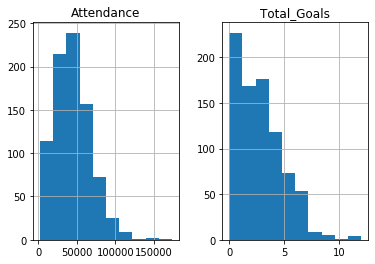

In [221]:
X.hist()

In [222]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

In [223]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=varc)

sc = MinMaxScaler()
Xmm = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [224]:
pca = PCA(n_components=2)
Xp = pd.DataFrame(pca.fit_transform(Xs),columns=['d1','d2'])
pca.explained_variance_ratio_.cumsum()

array([0.55470966, 1.        ])

In [225]:
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2,n_jobs=-1)

In [226]:
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])
Xt = pd.DataFrame(tsne.fit_transform(Xmm),columns=['d1','d2'])

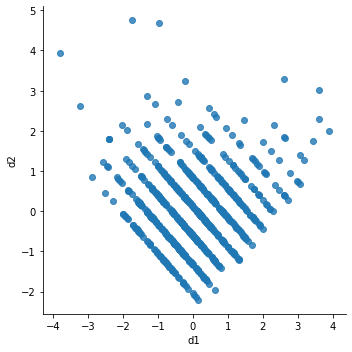

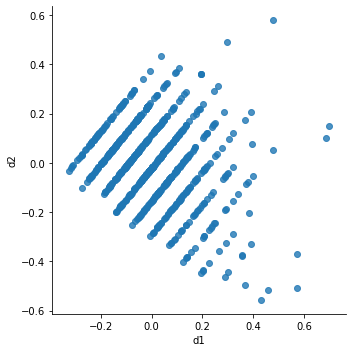

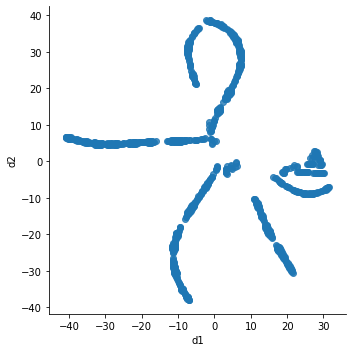

In [227]:
sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False)

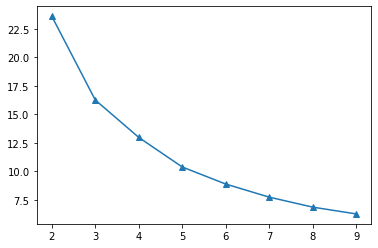

In [228]:
from sklearn.cluster import KMeans

l = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(Xmm)
    l.append(km.inertia_)

plt.plot(range(2,10),l,marker='^')

In [336]:
k = 3

In [337]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [338]:
cl_a = AgglomerativeClustering(n_clusters=k)
cl_k = KMeans(n_clusters=k)
cl_g = GaussianMixture(n_components=k)

In [339]:
df['cl_a'] = X['cl_a'] = Xs['cl_a'] = Xp['cl_a'] = Xt['cl_a'] = Xmm['cl_a'] = Xm['cl_a'] = cl_a.fit_predict(Xmm)
df['cl_k'] = X['cl_k'] = Xs['cl_k'] = Xp['cl_k'] = Xt['cl_k'] = Xmm['cl_k'] = Xm['cl_k'] = cl_k.fit_predict(Xmm)
df['cl_g'] = X['cl_g'] = Xs['cl_g'] = Xp['cl_g'] = Xt['cl_g'] = Xmm['cl_g'] = Xm['cl_g'] = cl_g.fit_predict(X)

In [340]:
var_cl = [v for v in df.columns if v[:2]=='cl']

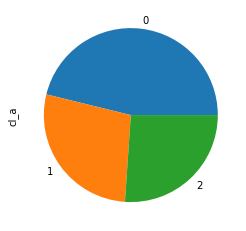

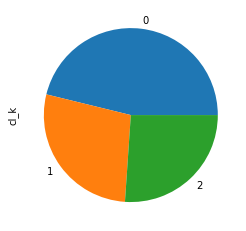

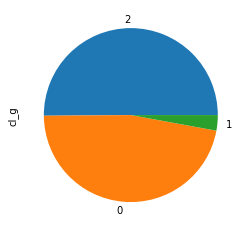

In [341]:
for v in var_cl:
    df[v].value_counts(True).plot(kind='pie')
    plt.show()

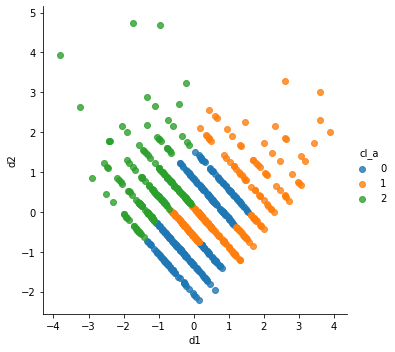

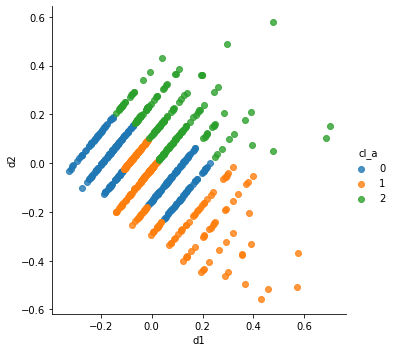

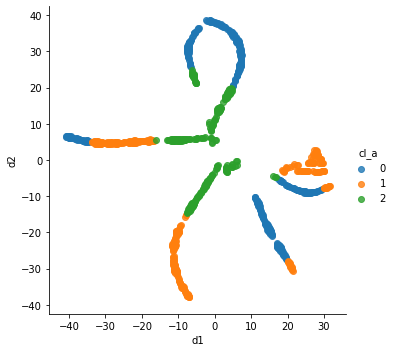

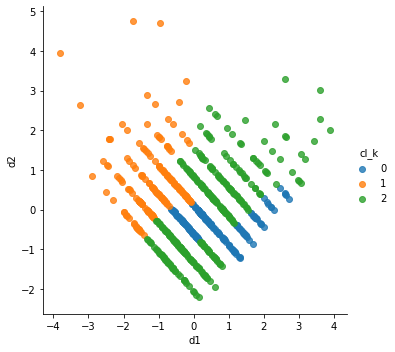

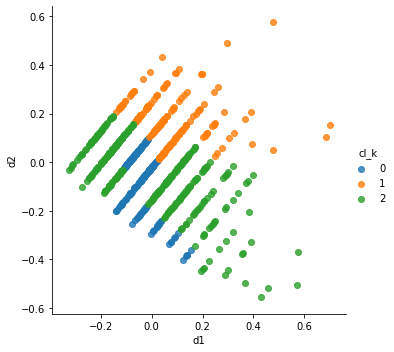

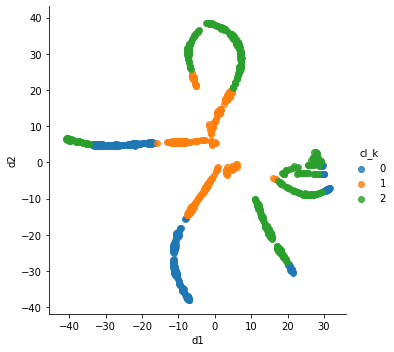

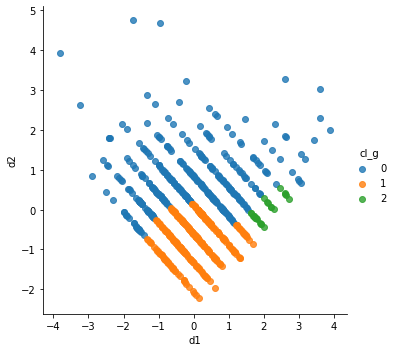

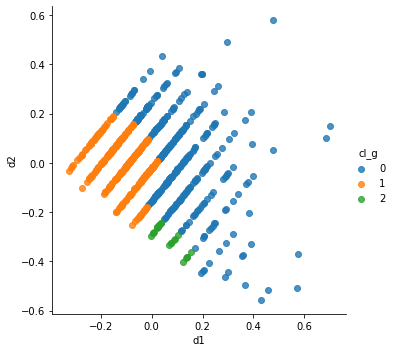

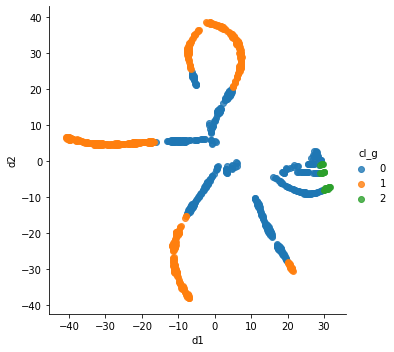

In [320]:
for v in var_cl:
    sns.lmplot(data=Xp,x='d1',y='d2',fit_reg=False,hue=v)
    sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue=v)
    sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue=v)

In [342]:
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import chisquare

In [343]:
l_p = []
for v in varc:
    l = []
    for i in range(k):
        l.append(df.loc[df.cl_g==i][v].to_list())
    kr = kruskal(*l)
    l_p.append((v,kr.pvalue))

In [344]:
df_sig = pd.DataFrame(l_p,columns=['variable','p-value'])
df_sig['p-value'] = df_sig['p-value'].map(lambda x:round(x,6))
df_sig

,variable,p-value
0,Total_Goals,0.0
1,Attendance,0.0


In [345]:
df[varc].corr()

,Total_Goals,Attendance
Total_Goals,1.000000,-0.109419
Attendance,-0.109419,1.000000


In [347]:
df[varc+['cl_k']].groupby('cl_k').mean()

,Total_Goals,Attendance
cl_k,,
0,3.158031,36641.748705
1,2.987069,31271.549569
2,2.142202,73861.967890


In [348]:
df[varc].mean().to_frame().T

,Total_Goals,Attendance
0,2.845694,44857.205144


In [327]:
"""
0-> Goleadas, poca asistencia
1-> Goleadas, estadio pequeño 
2-> Partidos reñidos gran asistencia
3-> Partidos reñidos poca asistencia
4-> Partidos entretenidos
"""

'\n0-> Goleadas, poca asistencia\n1-> Goleadas, estadio pequeño \n2-> Partidos reñidos gran asistencia\n3-> Partidos reñidos poca asistencia\n4-> Partidos entretenidos\n'

In [349]:
df['Stage'] = df['Stage'].map(lambda x:'Group' if 'Group' in x else x)

In [350]:
for v in vard:
    aux = df.pivot_table(index='cl_k',
                         columns=v,
                         values='cl_a',
                         aggfunc='count',
                         fill_value=0).T

    aux['total'] = df[v].value_counts()
    aux = aux.apply(lambda x:x/x.sum()).T
    aux = aux.apply(lambda x:round(x*100,2))
    aux = aux.T
    aux

    print("************************%s*******************************"%v)
    print(aux)
    print('\n'*3)
    exp = aux['total'].to_list()
    for c in aux.columns:
        print(c)
        obs = aux[c].to_list()
        print(obs)
        print(exp)
        print(chisquare(f_obs=aux[c],f_exp=exp))
        print('\n')
    print('\n'*3)

************************Home Team Initials*******************************
cl_k                    0      1      2  total
Home Team Initials                            
ARG                  6.48   4.31   7.80   6.22
BRA                  8.03   5.60  15.60   9.33
ENG                  3.63   5.60   3.67   4.19
FRG                  5.44   3.02   6.88   5.14
ITA                  5.70   5.60  10.09   6.82
OTROS               70.73  75.86  55.96  68.30




0
[6.48, 8.03, 3.63, 5.44, 5.7, 70.73]
[6.22, 9.33, 4.19, 5.14, 6.82, 68.3]
Power_divergenceResult(statistic=0.5547438464455952, pvalue=0.9899814491579481)


1
[4.31, 5.6, 5.6, 3.02, 5.6, 75.86]
[6.22, 9.33, 4.19, 5.14, 6.82, 68.3]
Power_divergenceResult(statistic=4.481638255226084, pvalue=0.48234392941652093)


2
[7.8, 15.6, 3.67, 6.88, 10.09, 55.96]
[6.22, 9.33, 4.19, 5.14, 6.82, 68.3]
Power_divergenceResult(statistic=9.06589849330766, pvalue=0.10646438175216007)


total
[6.22, 9.33, 4.19, 5.14, 6.82, 68.3]
[6.22, 9.33, 4.19, 5.14, 6.82, 

In [351]:
aux = df[['Year','cl_k']].copy()
aux ['n'] = 1

In [352]:
aux = aux.pivot_table(index='cl_k',columns='Year',values='n',aggfunc='count',fill_value=0)

In [353]:
for c in aux.columns:
    aux[c]/=aux[c].sum()

In [354]:
aux

Year,1930.0,1934.0,1938.0,1950.0,1954.0,1958.0,1962.0,1966.0,1970.0,1974.0,1978.0,1982.0,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0
cl_k,,,,,,,,,,,,,,,,,,,,
0,0.611111,0.294118,0.555556,0.318182,0.846154,0.571429,0.40625,0.37500,0.50000,0.421053,0.605263,0.653846,0.442308,0.384615,0.269231,0.46875,0.453125,0.4375,0.421875,0.406250
1,0.388889,0.647059,0.444444,0.409091,0.153846,0.428571,0.37500,0.34375,0.15625,0.210526,0.184211,0.192308,0.288462,0.269231,0.057692,0.34375,0.421875,0.2500,0.265625,0.171875
2,0.000000,0.058824,0.000000,0.272727,0.000000,0.000000,0.21875,0.28125,0.34375,0.368421,0.210526,0.153846,0.269231,0.346154,0.673077,0.18750,0.125000,0.3125,0.312500,0.421875


In [355]:
ch = pygal.StackedBar(x_label_rotation=90)
ch.title = 'Estabilidad Clusters'
ch.x_labels = aux.columns
for i,row in aux.iterrows():
    ch.add('Cluster %d'%i, row)

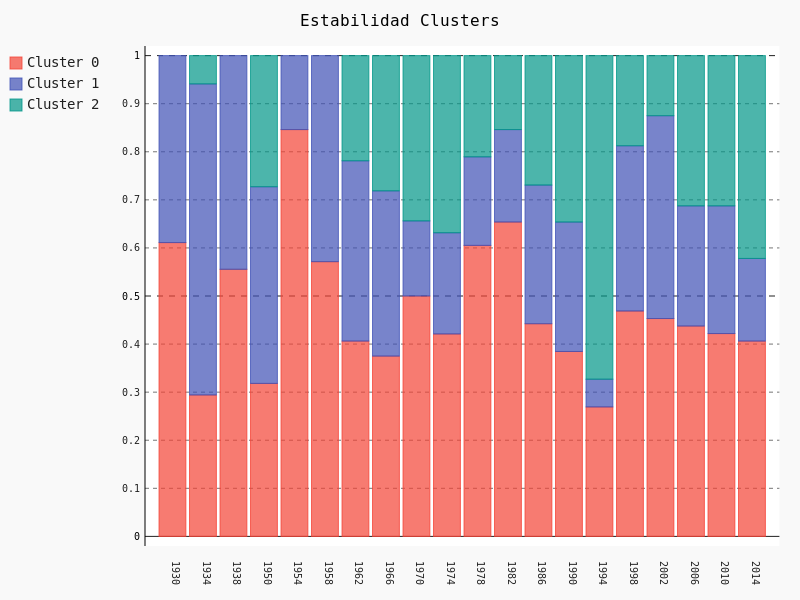

In [356]:
ch

In [357]:
aux['total'] = df.cl_g.value_counts(True).to_frame().sort_index()['cl_g']

In [358]:
df.loc[(df.Year==2014)&(df['Away Team Goals']==7)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total_Goals,cl_a,cl_k,cl_g
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,OTROS,8.0,0,0,2


In [359]:
aux = aux.apply(lambda x:round(x*100,1))

In [360]:
aux

Year,1930.0,1934.0,1938.0,1950.0,1954.0,1958.0,1962.0,1966.0,1970.0,1974.0,1978.0,1982.0,1986.0,1990.0,1994.0,1998.0,2002.0,2006.0,2010.0,2014.0,total
cl_k,,,,,,,,,,,,,,,,,,,,,
0,61.1,29.4,55.6,31.8,84.6,57.1,40.6,37.5,50.0,42.1,60.5,65.4,44.2,38.5,26.9,46.9,45.3,43.8,42.2,40.6,47.0
1,38.9,64.7,44.4,40.9,15.4,42.9,37.5,34.4,15.6,21.1,18.4,19.2,28.8,26.9,5.8,34.4,42.2,25.0,26.6,17.2,2.9
2,0.0,5.9,0.0,27.3,0.0,0.0,21.9,28.1,34.4,36.8,21.1,15.4,26.9,34.6,67.3,18.8,12.5,31.2,31.2,42.2,50.1


In [361]:
for c in aux.columns:
    if c!='total':
        print(c)
        obs = aux[c].to_list()
        exp = aux['total'].to_list()
        print(obs)
        print(exp)
        print(chisquare(f_obs=obs,f_exp=exp))
        print('\n')

1930.0
[61.1, 38.9, 0.0]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=501.226551724138, pvalue=1.445563591556811e-109)


1934.0
[29.4, 64.7, 5.9]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=1362.5647590219417, pvalue=1.326850402342309e-296)


1938.0
[55.6, 44.4, 0.0]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=645.5529273661042, pvalue=6.606370621131457e-141)


1950.0
[31.8, 40.9, 27.3]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=513.2228270678013, pvalue=3.5898731996062697e-112)


1954.0
[84.6, 15.4, 0.0]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=134.05931034482757, pvalue=7.751587161327252e-30)


1958.0
[57.1, 42.9, 0.0]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=603.9945634629495, pvalue=6.98629619419843e-132)


1962.0
[40.6, 37.5, 21.9]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=429.558336357366, pvalue=5.279495599500961e-94)


1966.0
[37.5, 34.4, 28.1]
[47.0, 2.9, 50.1]
Power_divergenceResult(statistic=353.73606382246516, pvalue=

In [362]:
aux = aux.apply(lambda x:x/100)

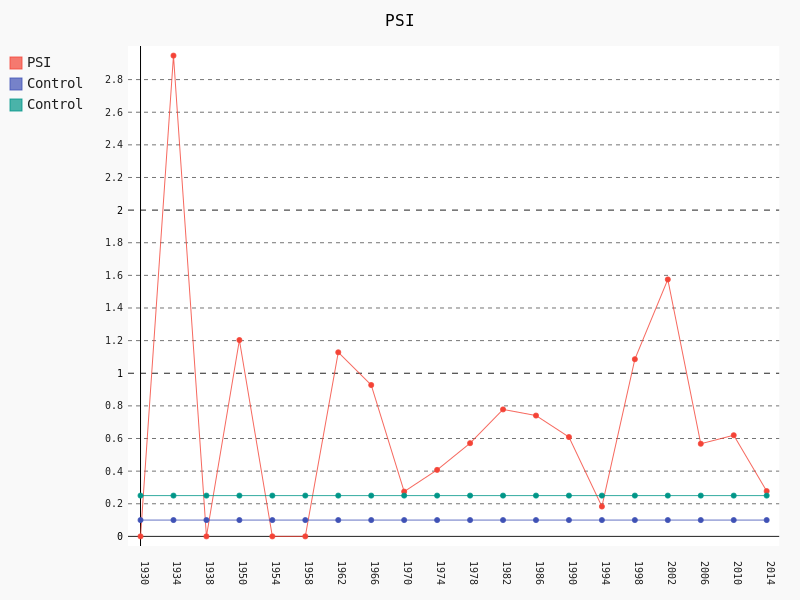

In [363]:
aux2 = aux.copy()

for c in aux.columns:
    if c!='total':
        aux[c]-=aux['total']

aux.drop('total',axis=1,inplace=True)

for c in aux2.columns:
    if c!='total':
        aux2[c]/=aux2['total']

aux2.drop('total',axis=1,inplace=True)

aux2 = aux2.apply(np.log)

aux2

aux = aux*aux2.values

ch = pygal.Line(x_label_rotation=90)
ch.title = 'PSI'
ch.x_labels = aux.columns
ch.add('PSI',aux.sum().map(lambda x:0 if np.isinf(x) else x))
ch.add('Control',[0.1]*len(aux.columns))
ch.add('Control',[0.25]*len(aux.columns))

In [364]:
aux.sum().to_frame()

,0
Year,
1930.0,inf
1934.0,2.946960
1938.0,inf
1950.0,1.203450
1954.0,inf
1958.0,inf
1962.0,1.128365
1966.0,0.927771
1970.0,0.274568
